In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# 株価データの取得
ticker = "AAPL"  # 例: Apple Inc.
data = yf.download(ticker, start="2020-01-01", end="2022-01-01")
prices = data['Close'].values.reshape(-1, 1)

# データの正規化
scaler = MinMaxScaler(feature_range=(-1, 1))
prices_normalized = scaler.fit_transform(prices)

# 訓練データとテストデータに分割
train_size = int(len(prices_normalized) * 0.8)
train_data = prices_normalized[:train_size]
test_data = prices_normalized[train_size:]


[*********************100%%**********************]  1 of 1 completed


In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        print("h0= ", h0, "\n")
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        print("out= ", out,"\n")
        return out


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1

model = GRUModel(input_dim, hidden_dim, output_dim, num_layers).to(device)

# ハイパーパラメータの設定
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# データの準備
train_data_tensor = torch.FloatTensor(train_data).unsqueeze(-1).to(device)
test_data_tensor = torch.FloatTensor(test_data).unsqueeze(-1).to(device)


In [ ]:
# loss_values = []
# num_epochs = 100

# for epoch in range(num_epochs):
#     model.train()
#     outputs = model(train_data_tensor)
#     optimizer.zero_grad()
#     loss = criterion(outputs, train_data_tensor[:, -1, :])
#     loss.backward()
#     optimizer.step()

#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
loss_values = []
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_data_tensor)
    loss = criterion(outputs, train_data_tensor[:, -1, :])
    loss_values.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Streaming output truncated to the last 5000 lines.
        [-4.5377e-01],
        [-4.5406e-01],
        [-4.0814e-01],
        [-4.2525e-01],
        [-4.0107e-01],
        [-4.1876e-01],
        [-4.2577e-01],
        [-4.6705e-01],
        [-4.3243e-01],
        [-4.5032e-01],
        [-4.9947e-01],
        [-4.4573e-01],
        [-5.1036e-01],
        [-4.9110e-01],
        [-5.0229e-01],
        [-5.0571e-01],
        [-5.3380e-01],
        [-5.4260e-01],
        [-5.0192e-01],
        [-5.0437e-01],
        [-4.8102e-01],
        [-5.0036e-01],
        [-4.8758e-01],
        [-4.8852e-01],
        [-5.1271e-01],
        [-5.0544e-01],
        [-5.1180e-01],
        [-4.7373e-01],
        [-4.7923e-01],
        [-4.6723e-01],
        [-4.6376e-01],
        [-4.5426e-01],
        [-4.2934e-01],
        [-4.3407e-01],
        [-4.2999e-01],
        [-4.3701e-01],
        [-4.4761e-01],
        [-4.6307e-01],
        [-4.4911e-01],
        [-4.5104e-01],
        [-4.3671e-01],
      

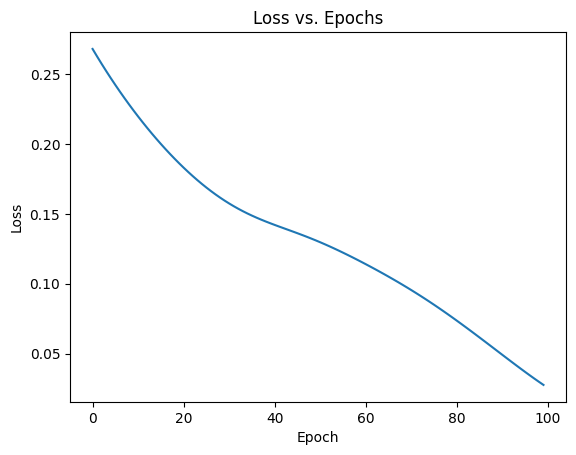

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


In [ ]:
model.eval()
predicted = model(test_data_tensor)
predicted = predicted.cpu().detach().numpy()
predicted_prices = scaler.inverse_transform(predicted)


h0=  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]) 

out=  tensor([[0.1811],
        [0.1833],
        [0.2088],
        [0.2106],
        [0.2274],
        [0.2197],
        [0.1876],
        [0.1905],
        [0.2030],
        [0.2157],
        [0.2149],
        [0.2044],
        [0.1975],
        [0.2064],
        [0.2438],
        [0.2332],
        [0.2388],
        [0.2481],
        [0.2534],
        [0.2726],
        [0.2599],
        [0.2515],
        [0.2095],
        [0.2143],
        [0.2024],
        [0.21

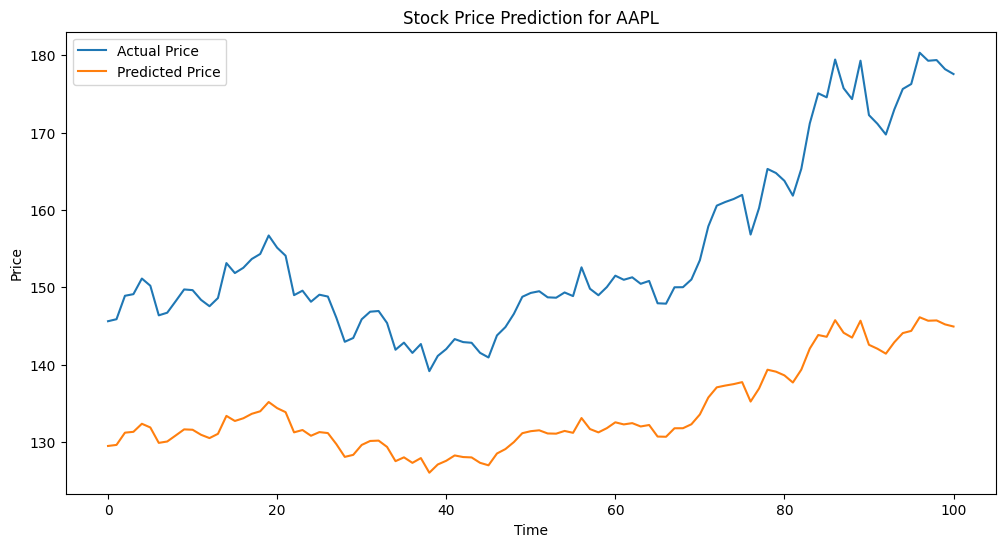

In [ ]:
actual_prices = scaler.inverse_transform(test_data)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'Stock Price Prediction for {ticker}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()